In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [60]:
df = pd.read_csv('churn.csv')
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [61]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [62]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [63]:
X = df[['Geography','Gender','HasCrCard','IsActiveMember']]
y = df['Exited']
print(X[:5])
print(y[:5])

   Geography  Gender  HasCrCard  IsActiveMember
0          0       0          1               1
1          2       0          0               1
2          0       0          1               0
3          0       0          0               0
4          2       0          1               1
0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [68]:
dtree = DecisionTreeClassifier(random_state=12)
dtree.fit(X,y)

DecisionTreeClassifier(random_state=12)

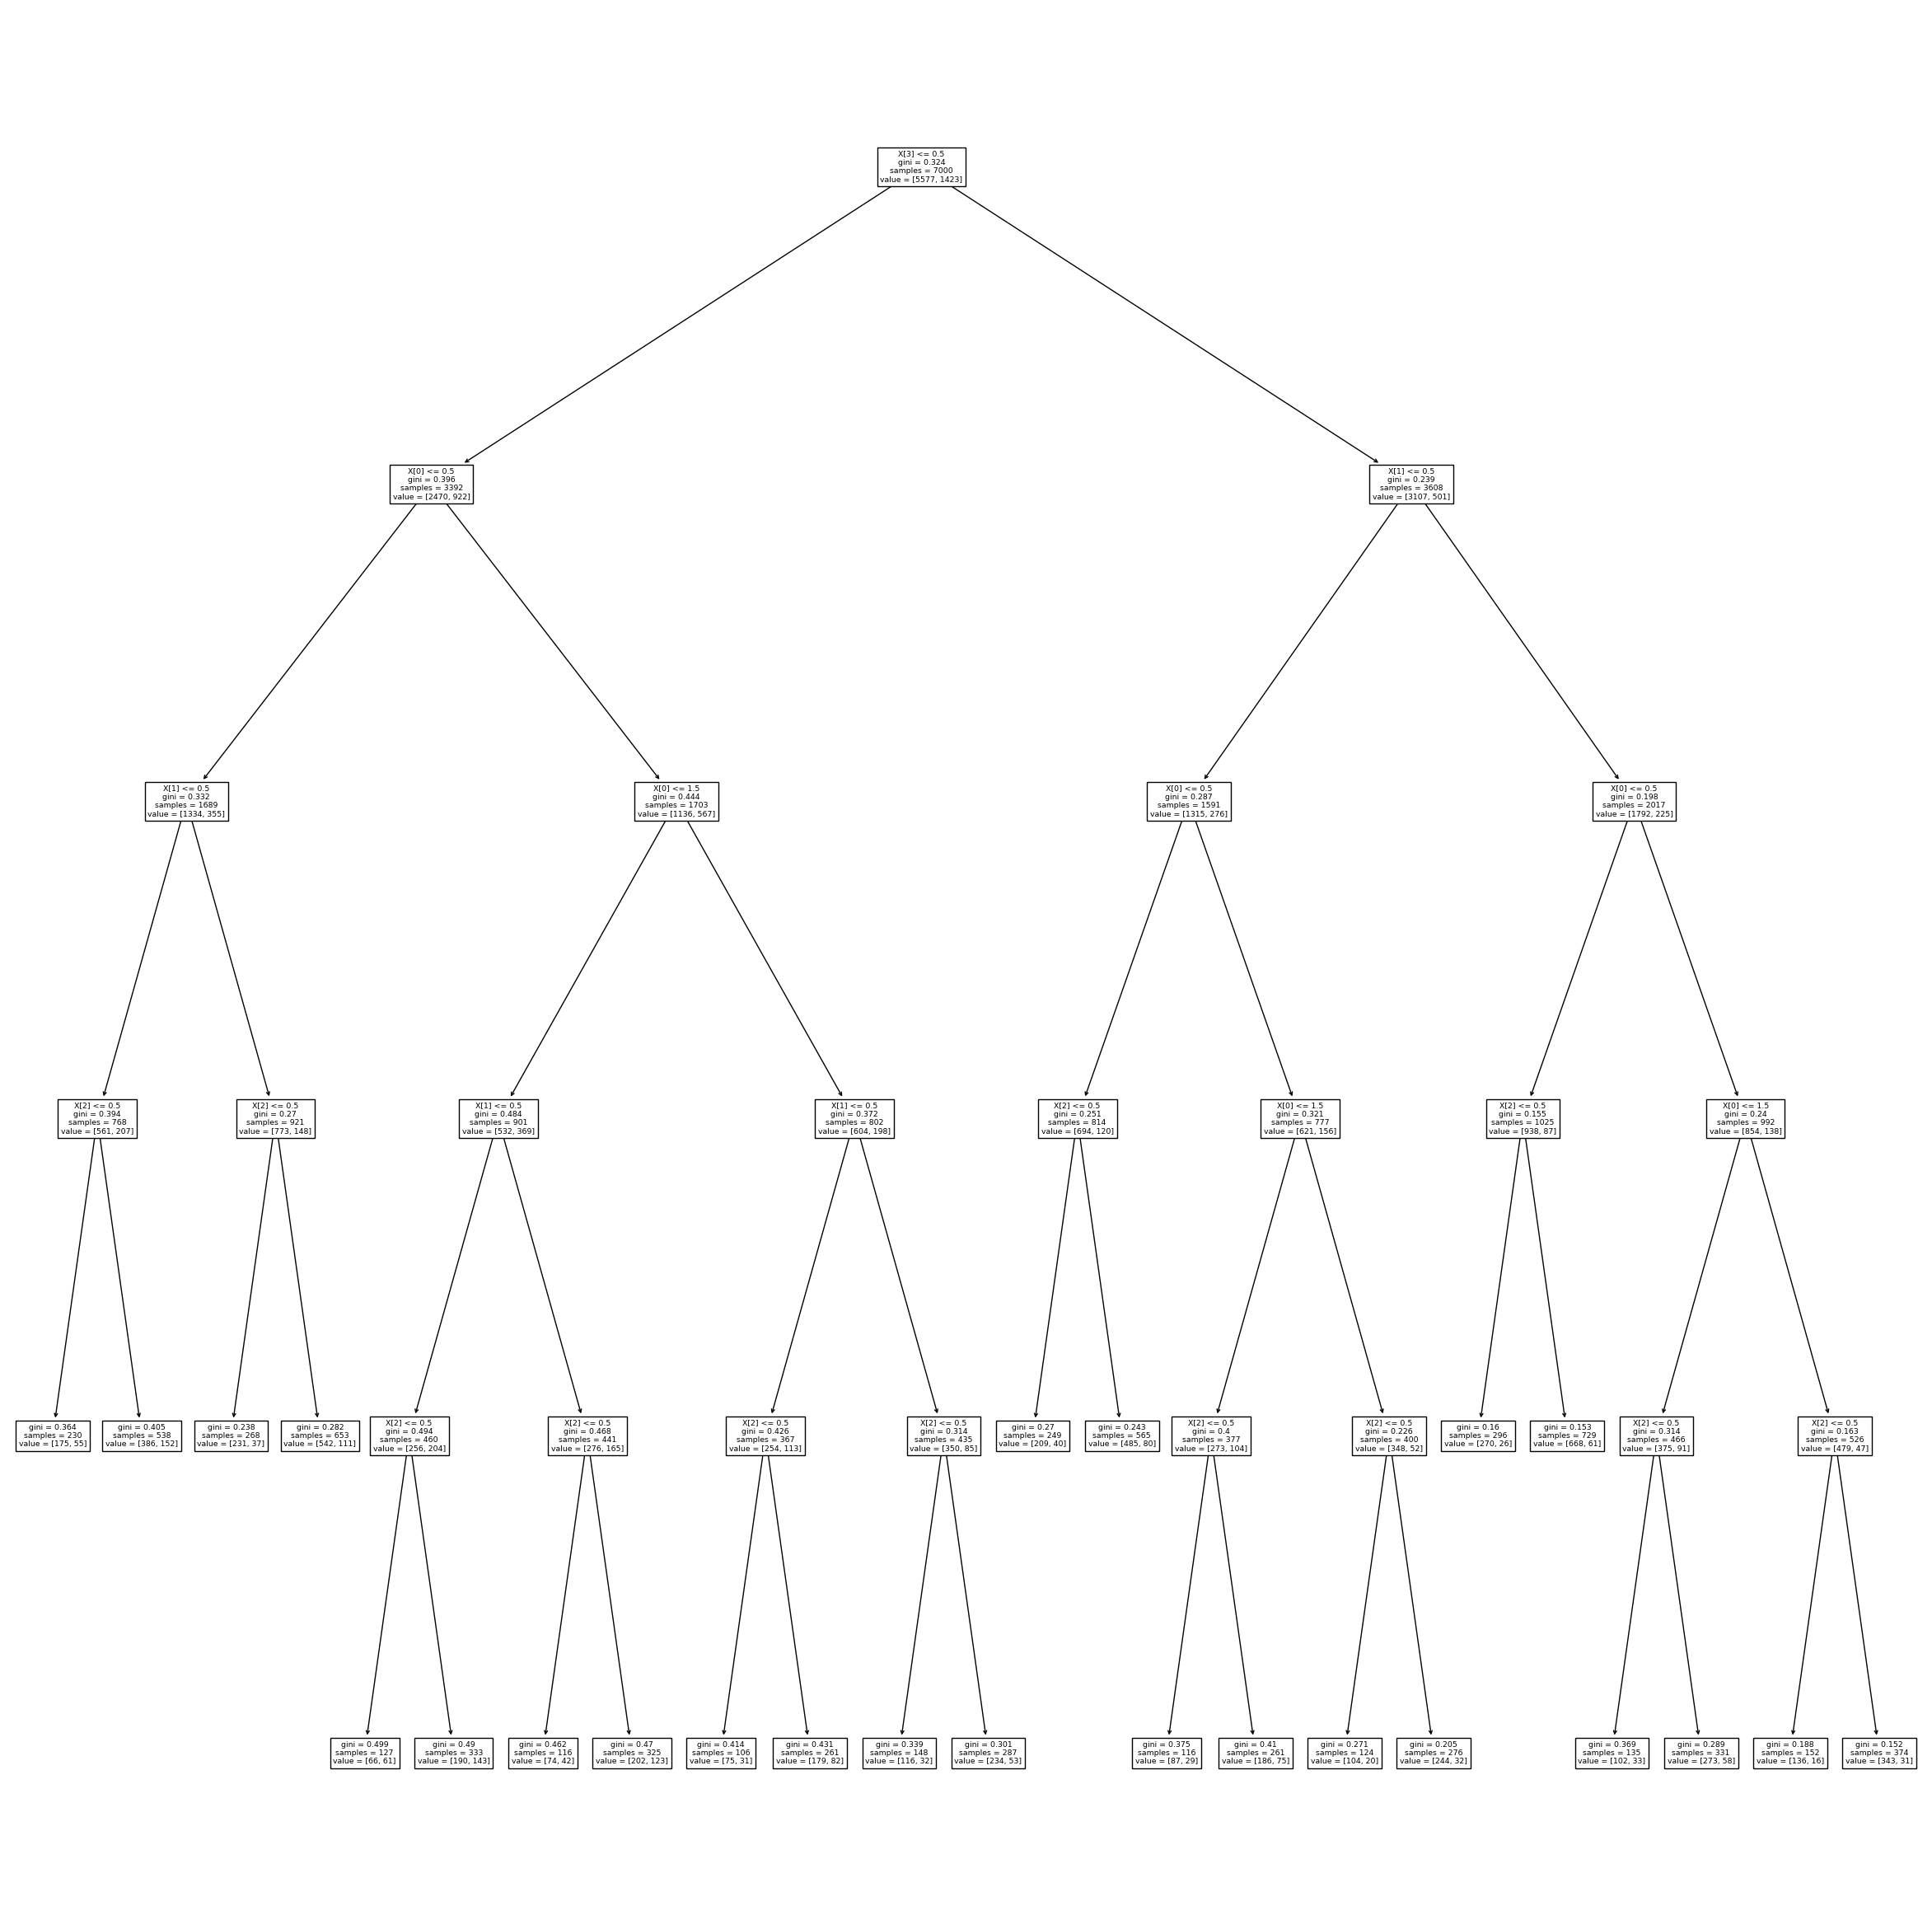

In [66]:
plt.figure(figsize=(30,30))
plot_tree(dtree)
plt.show()

In [70]:
y_pred = dtree.predict(X_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
print(cnf_matrix)
pd.DataFrame({'Actual': y_test, "Predicted": y_pred})

[[2386    0]
 [ 614    0]]


,Actual,Predicted
9250,0,0
2791,0,0
492,0,0
6082,0,0
7892,0,0
...,...,...
7419,0,0
5951,0,0
7304,0,0
7206,0,0
